# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![image.png](attachment:image.png)

![image.png](attachment:image.png)

 # TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
!pip install quandl

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import quandl
import seaborn as sns


In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


ModuleNotFoundError: ignored

In [ ]:
# API to call data
# Since we are limited by free tier, we have prepared and saved the data for later usage
facebook_df = quandl.get('WIKI/FB', start_date = '07-11-2013', end_date = '26-08-2020')


In [ ]:
facebook_df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-11-07,49.24,49.87,47.30,47.560,97128000.0,0.0,1.0,49.24,49.87,47.30,47.560,97128000.0
2013-11-08,47.81,48.65,47.25,47.530,70731000.0,0.0,1.0,47.81,48.65,47.25,47.530,70731000.0
2013-11-11,47.04,47.53,45.73,46.200,80910000.0,0.0,1.0,47.04,47.53,45.73,46.200,80910000.0
2013-11-12,46.00,47.37,45.83,46.605,68196000.0,0.0,1.0,46.00,47.37,45.83,46.605,68196000.0
2013-11-13,46.23,48.74,46.06,48.710,79245000.0,0.0,1.0,46.23,48.74,46.06,48.710,79245000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,164.80,173.40,163.30,169.390,105350867.0,0.0,1.0,164.80,173.40,163.30,169.390,105350867.0
2018-03-22,166.13,170.27,163.72,164.890,73389988.0,0.0,1.0,166.13,170.27,163.72,164.890,73389988.0
2018-03-23,165.44,167.10,159.02,159.390,52306891.0,0.0,1.0,165.44,167.10,159.02,159.390,52306891.0


In [ ]:
# Read the files
stocks_df = pd.read_csv('/content/stock_data.csv')
stocks_df

,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144
...,...,...,...,...
1707,2020-08-20,269.010010,38.959999,497.899994
1708,2020-08-21,267.010010,39.259998,492.309998
1709,2020-08-24,271.390015,40.490002,488.809998
1710,2020-08-25,280.820007,40.549999,490.579987


In [ ]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144
...,...,...,...,...
1707,2020-08-20,269.010010,38.959999,497.899994
1708,2020-08-21,267.010010,39.259998,492.309998
1709,2020-08-24,271.390015,40.490002,488.809998
1710,2020-08-25,280.820007,40.549999,490.579987


MINI CHALLENGE #1:
- Obtain the data for APPLE Inc. (AAPL) using Quandl. You can use the same start and end date. 

In [ ]:
AAPL = quandl.get('WIKI/AAPL', start_date = '07-11-2013', end_date = '26-08-2020')
AAPL

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-11-07,519.58,523.19,512.38,512.492,9379300.0,0.0,1.0,69.063873,69.543724,68.106831,68.121719,65655100.0
2013-11-08,514.58,521.13,512.59,520.560,9975600.0,0.0,1.0,68.399261,69.269903,68.134745,69.194137,69829200.0
2013-11-11,519.99,521.67,514.41,519.048,8123300.0,0.0,1.0,69.118372,69.341681,68.376664,68.993159,56863100.0
2013-11-12,517.67,523.92,517.00,520.010,7295600.0,0.0,1.0,68.809991,69.640757,68.720933,69.121030,51069200.0
2013-11-13,518.00,522.25,516.96,520.634,7043600.0,0.0,1.0,68.853856,69.418776,68.715616,69.203974,49305200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# Checking null values
stocks_df.isnull().sum()

Date    0
FB      0
TWTR    0
NFLX    0
dtype: int64

In [ ]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1712 entries, 0 to 1711
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1712 non-null   object 
 1   FB      1712 non-null   float64
 2   TWTR    1712 non-null   float64
 3   NFLX    1712 non-null   float64
dtypes: float64(3), object(1)
memory usage: 66.9+ KB


In [ ]:
# Print the number of stocks
print('Total Number of Stocks: {}'.format(len(stocks_df.columns[1:])))

Total Number of Stocks: 3


MINI CHALLENGE #2: 
- What is the average price of facebook?
- Which stock has the minimum dispertion from the mean in dollar value?
- What is the maximum price for Netflix stock over the specified time period?
- Hint: Try this out: stocks_df.describe() 

In [ ]:
stocks_df.describe()

,FB,TWTR,NFLX
count,1712.000000,1712.000000,1712.000000
mean,136.966992,31.352909,197.657978
std,51.177336,11.483347,129.765005
min,44.820000,14.010000,44.887142
25%,89.122500,19.639999,90.689999
50%,137.824997,31.720000,144.245002
75%,178.407501,38.315001,322.102493
max,303.910004,73.309998,548.729980


# TASK #4: PERFORM BASIC DATA VISUALIZATION

In [ ]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method

def show_plot(df, fig_title):
  df.plot(x='Date', figsize=(20,10), title=fig_title)
  plt.grid()
  plt.show()

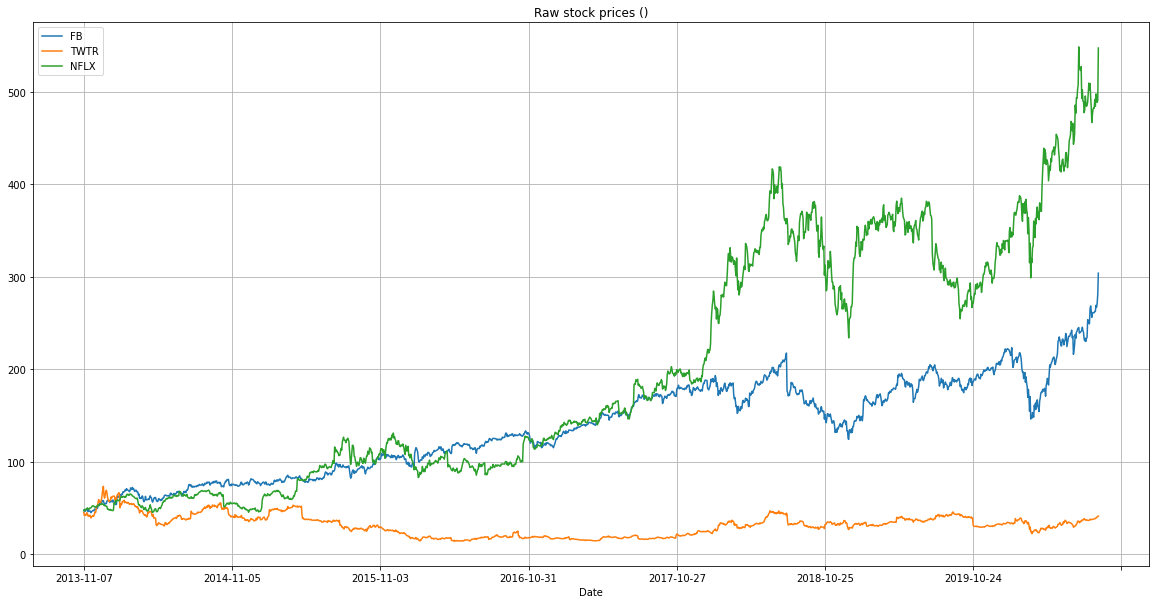

In [ ]:
# Plot the data
show_plot(stocks_df, 'Raw stock prices ()')

MINI CHALLENGE #3:
- Let's assume that we want to normalize our stock prices data, what should we do?
- Print out normalized (scaled) stock prices 

In [ ]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i]=x[i]/x[i][0]
  return x

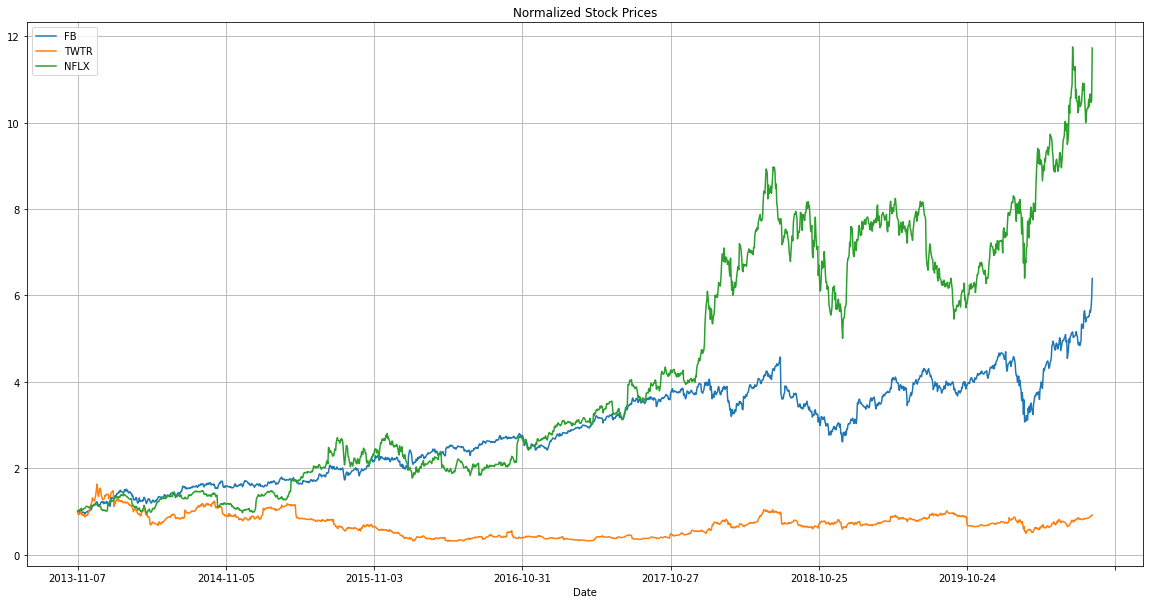

In [ ]:
show_plot(normalize(stocks_df), 'Normalized Stock Prices')

# TASK #5: PERFORM INTERACTIVE DATA VISUALIZATION 

In [ ]:
# Function to plot interative plot plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

MINI CHALLENGE #4:
- Plot normalized stock data in an interactive way
- It seems that most stocks experienced massive drops in Q1 of 2020, let's assume that you own 1000 shares of Facebook on Jan 2nd, 2020 and you sold them on March 16th, 2020. How much did you lose (in $)?**

In [ ]:
interactive_plot(normalize(stocks_df), 'Prices')
 Net loss = $209.78 - $146.01 = $63.77 * 1000 = $63770


# TASK #6: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [ ]:
stocks_df

,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144
...,...,...,...,...
1707,2020-08-20,269.010010,38.959999,497.899994
1708,2020-08-21,267.010010,39.259998,492.309998
1709,2020-08-24,271.390015,40.490002,488.809998
1710,2020-08-25,280.820007,40.549999,490.579987


In [ ]:
# Let's calculate daily return for a single security
# Let's take Facebook as an example first

df=stocks_df['FB']

# Define a dataframe names df_daily_return 
df_daily_return = df.copy()

#Loop through every element in the dataframe
for j in range(1, len(df)):
  # Calculate the percentage of change from the previous day
    df_daily_return[j] = ((df[j]-df[j-1])/df[j-1]) * 100 
# put zero in the first line item
df_daily_return[0] = 0
df_daily_return

0       0.000000
1      -0.063082
2      -2.798229
3       0.887446
4       4.505467
          ...   
1707    2.444881
1708   -0.743467
1709    1.640390
1710    3.474701
1711    8.222348
Name: FB, Length: 1712, dtype: float64

MINI CHALLENGE #5:
- Calculate the daily return for Twitter stock

In [ ]:
 df=stocks_df['TWTR']
 df_daily_return = df.copy()

 for j in range(1, len(df)):
  # Calculate the percentage of change from the previous day
    df_daily_return[j] = ((df[j]-df[j-1])/df[j-1]) * 100 
# put zero in the first line item
df_daily_return[0] = 0
df_daily_return

0       0.000000
1      -7.238307
2       3.001200
3      -2.331002
4       1.670635
          ...   
1707    0.179995
1708    0.770018
1709    3.132970
1710    0.148177
1711    1.307036
Name: TWTR, Length: 1712, dtype: float64

# TASK #7: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [ ]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [ ]:
# Get the daily returns
stocks_daily_return=daily_return(stocks_df)
stocks_daily_return

,Date,FB,TWTR,NFLX
0,2013-11-07,0.000000,0.000000,0.000000
1,2013-11-08,-0.063082,-7.238307,2.459768
2,2013-11-11,-2.798229,3.001200,0.898778
3,2013-11-12,0.887446,-2.331002,-1.237020
4,2013-11-13,4.505467,1.670635,0.464452
...,...,...,...,...
1707,2020-08-20,2.444881,0.179995,2.759374
1708,2020-08-21,-0.743467,0.770018,-1.122715
1709,2020-08-24,1.640390,3.132970,-0.710934
1710,2020-08-25,3.474701,0.148177,0.362102


,Date,FB,TWTR,NFLX
0,2013-11-07,0.000000,0.000000,0.000000
1,2013-11-08,-0.063082,-7.238307,2.459768
2,2013-11-11,-2.798229,3.001200,0.898778
3,2013-11-12,0.887446,-2.331002,-1.237020
4,2013-11-13,4.505467,1.670635,0.464452
...,...,...,...,...
1707,2020-08-20,2.444881,0.179995,2.759374
1708,2020-08-21,-0.743467,0.770018,-1.122715
1709,2020-08-24,1.640390,3.132970,-0.710934
1710,2020-08-25,3.474701,0.148177,0.362102


MINI CHALLENGE #6:
- What is the maximum daily return in % values

In [ ]:
stocks_daily_return.describe()

,FB,TWTR,NFLX
count,1712.000000,1712.000000,1712.000000
mean,0.129141,0.053982,0.178865
std,2.033765,3.412102,2.655420
min,-18.960922,-24.162501,-19.369575
25%,-0.792595,-1.437036,-1.122336
50%,0.124175,0.081263,0.045320
75%,1.129270,1.504148,1.470393
max,15.521445,21.417081,19.028054


# TASK #8: ANALYZE DAILY RETURNS

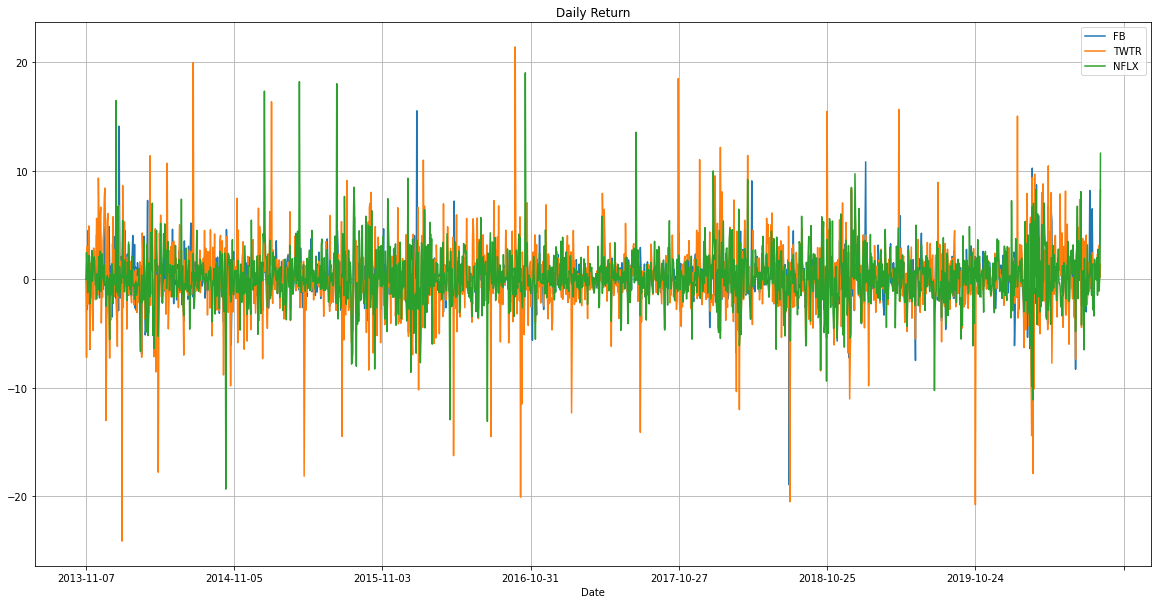

In [ ]:
# Plot the daily returns
show_plot(stocks_daily_return, 'Daily Return')

In [ ]:
# Plot the interactive chart
interactive_plot(stocks_daily_return, 'Daily Return')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9120774eb8>,
      dtype=object)

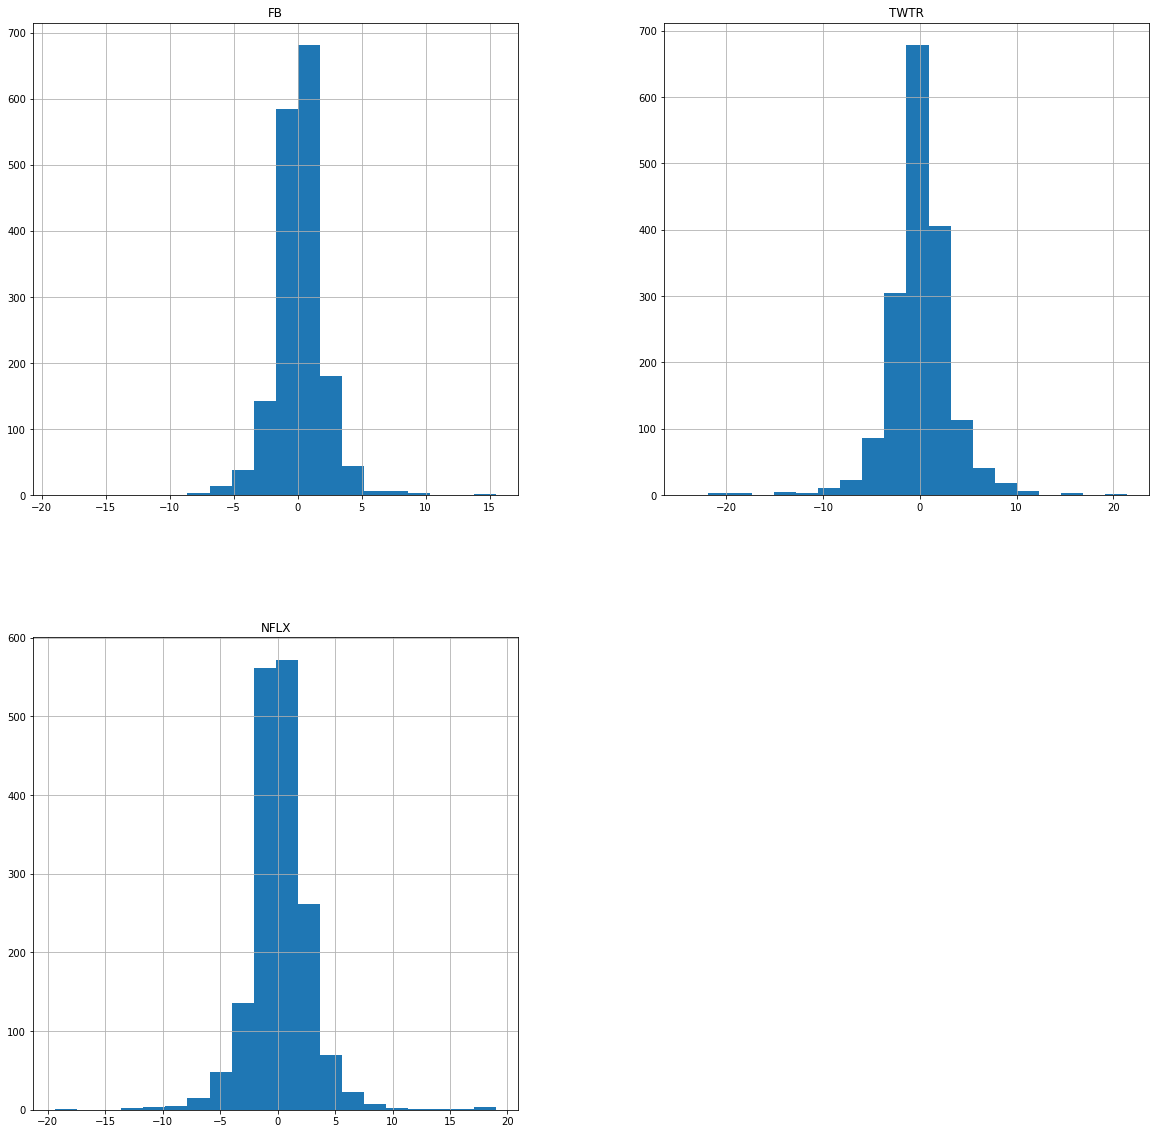

In [ ]:
# Histogram of daily returns
stocks_daily_return.hist(figsize=(20,20), bins=20)

In [ ]:
df_hist = stocks_daily_return.copy()
df_hist = df_hist.drop(columns = ['Date'])
data = []
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)

# Create distplot with custom bin_size
fig = ff.create_distplot(data, df_hist.columns, bin_size=0.1)
fig.show()

MINI CHALLENGE #7:
- Calculate the correlation matrix for the stocks daily return and comment on your answer

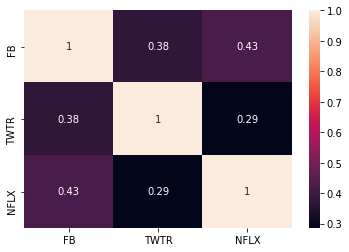

In [ ]:
cm = stocks_daily_return.drop(columns=['Date']).corr()
sns.heatmap(cm, annot=True)

# CONGRATULATION!

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1 SOLUTION:
- Obtain the data for APPLE Inc. (AAPL) using Quandl. You can use the same start and end date. 

AAPL = quandl.get('WIKI/AAPL',start_date='07-11-2013',end_date='26-08-2020')

In [ ]:
AAPL

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-11-07,519.58,523.19,512.38,512.492,9379300.0,0.0,1.0,69.063873,69.543724,68.106831,68.121719,65655100.0
2013-11-08,514.58,521.13,512.59,520.560,9975600.0,0.0,1.0,68.399261,69.269903,68.134745,69.194137,69829200.0
2013-11-11,519.99,521.67,514.41,519.048,8123300.0,0.0,1.0,69.118372,69.341681,68.376664,68.993159,56863100.0
2013-11-12,517.67,523.92,517.00,520.010,7295600.0,0.0,1.0,68.809991,69.640757,68.720933,69.121030,51069200.0
2013-11-13,518.00,522.25,516.96,520.634,7043600.0,0.0,1.0,68.853856,69.418776,68.715616,69.203974,49305200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


MINI CHALLENGE #2 SOLUTION: 
- What is the average price of facebook?
- Which stock has the minimum dispertion from the mean in dollar value?
- What is the maximum price for Netflix stock over the specified time period?
- Hint: Try this out: stocks_df.describe() 

In [ ]:
# Statistical data of the dataframe
stocks_df.describe()

# Get the mean values
stocks_df.mean()

# Get the standard deviation of stocks (Volatality)
stocks_df.std()

FB       51.177336
TWTR     11.483347
NFLX    129.765005
dtype: float64

MINI CHALLENGE #3 SOLUTION:
- Let's assume that we want to normalize our stock prices data, what should we do?
- Print out normalized (scaled) stock prices 

In [ ]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()
  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x


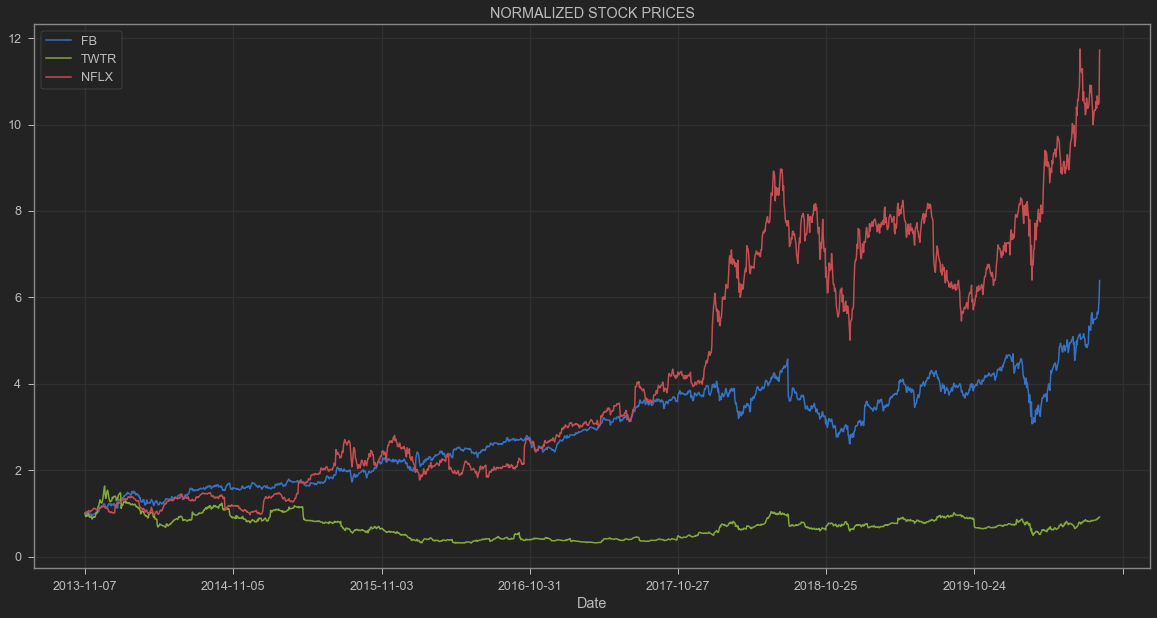

In [ ]:
# Plot normalized data
# Notice the massive gains in Netflix Stock compared to Twitter stock
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

MINI CHALLENGE #4 SOLUTION:
- Plot normalized stock data in an interactive way
- It seems that most stocks experienced massive drops in Q1 of 2020, let's assume that you own 1000 shares of Facebook on Jan 2nd, 2020 and you sold them on March 16th, 2020. How much did you lose (in $)?**

In [ ]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')
# Facebook stock dropped from $209.78 on Jan 2nd, 2020 to $146.01 by March 16th, 2020 
# Net loss = $209.78 - $146.01 = $63.77 * 1000 = $63770

MINI CHALLENGE #5 SOLUTION:
- Calculate the daily return for Twitter stock

In [ ]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first

df = stocks_df['TWTR']

# Define a dataframe names df_daily_return 
df_daily_return = df.copy()

#Loop through every element in the dataframe
for j in range(1, len(df)):

  # Calculate the percentage of change from the previous day
  df_daily_return[j] = ((df[j]- df[j-1])/df[j-1]) * 100

# put zero in the first line item
df_daily_return[0] = 0
df_daily_return

0       0.000000
1      -7.238307
2       3.001200
3      -2.331002
4       1.670635
          ...   
1707    0.179995
1708    0.770018
1709    3.132970
1710    0.148177
1711    1.307036
Name: TWTR, Length: 1712, dtype: float64

MINI CHALLENGE #6 SOLUTION:
- What is the maximum daily return in % values

In [ ]:
stocks_daily_return.describe()

,FB,TWTR,NFLX
count,1712.000000,1712.000000,1712.000000
mean,0.129141,0.053982,0.178865
std,2.033765,3.412102,2.655420
min,-18.960922,-24.162501,-19.369575
25%,-0.792595,-1.437036,-1.122336
50%,0.124175,0.081263,0.045320
75%,1.129270,1.504148,1.470393
max,15.521445,21.417081,19.028054


MINI CHALLENGE #7 SOLUTION:
- Calculate the correlation matrix for the stocks daily return and comment on your answer

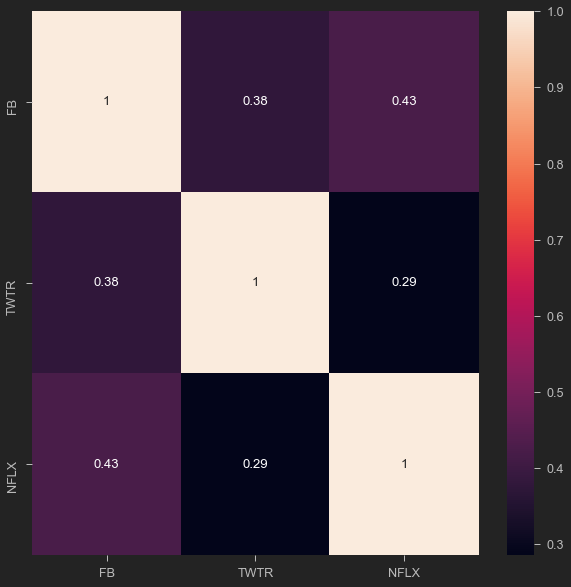

In [ ]:
# Daily Return Correlation
# It is better to take correlations into account to ensure a diversified portfolio and reduce the risk exposure.

cm = stocks_daily_return.drop(columns = ['Date']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)